In [68]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# data collection
import pandas_datareader as pdr

In [69]:
# the api_key that was geneated in the 'tiingo' site
key = 'Enter Your API Key Here'

In [70]:
# storing the Stock price data for Apple into a dataframe
df = pdr.get_data_tiingo('FB', api_key = key) 

# checking the data
df.head()

close   high    low   open    volume  \
symbol date                                                               
FB     2015-06-01 00:00:00+00:00  80.290  80.38  78.66  79.30  18119012   
       2015-06-02 00:00:00+00:00  80.445  81.35  79.56  79.76  18923300   
       2015-06-03 00:00:00+00:00  82.440  82.53  81.25  81.35  31774993   
       2015-06-04 00:00:00+00:00  82.050  82.95  81.51  82.14  20863877   
       2015-06-05 00:00:00+00:00  82.140  82.46  81.51  81.87  16143093   

                                  adjClose  adjHigh  adjLow  adjOpen  \
symbol date                                                            
FB     2015-06-01 00:00:00+00:00    80.290    80.38   78.66    79.30   
       2015-06-02 00:00:00+00:00    80.445    81.35   79.56    79.76   
       2015-06-03 00:00:00+00:00    82.440    82.53   81.25    81.35   
       2015-06-04 00:00:00+00:00    82.050    82.95   81.51    82.14   
       2015-06-05 00:00:00+00:00    82.140    82.46   81.51    81.87   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
FB     2015-06-01 00:00:00+00:00   18119012      0.0          1.0  
       2015-06-02 00:00:00+00:00   18923300      0.0          1.0  
       2015-06-03 00:00:00+00:00   31774993      0.0          1.0  
       2015-06-04 00:00:00+00:00   20863877      0.0          1.0  
       2015-06-05 00:00:00+00:00   16143093      0.0          1.0

In [71]:
#coverting the data into a csv for future use
df.to_csv('facebook_stock_price.csv')

In [49]:
#df = pd.read_csv("facebook_stock_price.csv")

In [72]:
df.tail()

close      high       low    open  \
symbol date                                                            
FB     2020-05-22 00:00:00+00:00  234.91  235.9900  228.7400  231.51   
       2020-05-26 00:00:00+00:00  232.20  240.9000  231.6700  239.77   
       2020-05-27 00:00:00+00:00  229.14  230.5600  221.1347  229.07   
       2020-05-28 00:00:00+00:00  225.46  231.6332  224.0000  224.30   
       2020-05-29 00:00:00+00:00  225.09  227.4900  222.8800  225.20   

                                    volume  adjClose   adjHigh    adjLow  \
symbol date                                                                
FB     2020-05-22 00:00:00+00:00  33925564    234.91  235.9900  228.7400   
       2020-05-26 00:00:00+00:00  33178318    232.20  240.9000  231.6700   
       2020-05-27 00:00:00+00:00  34697553    229.14  230.5600  221.1347   
       2020-05-28 00:00:00+00:00  29423013    225.46  231.6332  224.0000   
       2020-05-29 00:00:00+00:00  23322476    225.09  227.4900  222.8800   

                                  adjOpen  adjVolume  divCash  splitFactor  
symbol date                                                                 
FB     2020-05-22 00:00:00+00:00   231.51   33925564      0.0          1.0  
       2020-05-26 00:00:00+00:00   239.77   33178318      0.0          1.0  
       2020-05-27 00:00:00+00:00   229.07   34697553      0.0          1.0  
       2020-05-28 00:00:00+00:00   224.30   29423013      0.0          1.0  
       2020-05-29 00:00:00+00:00   225.20   23322476      0.0          1.0

So, we got Apple stock data from 2015-06-01 to 2020-05-29. That's 5 years of stock data.

Now, we will use the Closing stock price for apple to do our prediction.

# Preprocessing

In [73]:
# indexing the data by the Closeing price
df1 = df.reset_index()['close']
df1.shape

(1259,)

In [74]:
df1

0        80.290
1        80.445
2        82.440
3        82.050
4        82.140
         ...   
1254    234.910
1255    232.200
1256    229.140
1257    225.460
1258    225.090
Name: close, Length: 1259, dtype: float64

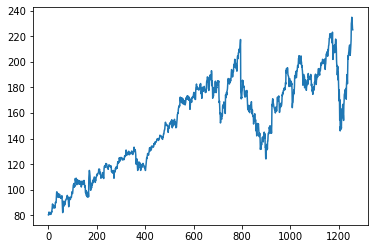

In [75]:
# plotinng the closing prices
plt.plot(df1)

### LSTM are sensitive to the scale of the data. So, we apply MinMax Scaler here and scaling the data into (0, 1)

In [76]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))
# reshaped the dataframe in order to fit and transform with the scaler
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

# looking at the data, which is an array now with values in between 0 and 1.
df1 #or print(df1)

array([[0.        ],
       [0.00100246],
       [0.01390506],
       ...,
       [0.96268271],
       [0.93888242],
       [0.93648946]])

In [77]:
df1.shape

(1259, 1)

### Important Note

We can use methods such as (a) Cross Validation or (b) Random seed, etc. to train-test-split in case of regression and classification.

But while dealing with time series data, we need to remember that the occurence on any date is dependent on the previous day. So, upto a certain date, we';; assign the data to the training set and the other part of the data into the testing set to keep the originality/ relation between the data point intact.

In [78]:
# train-test-split
train_size = int(len(df1)*0.70)
test_size = len(df1) - train_size

train_data, test_data = df1[0: train_size,:], df1[train_size: len(df1), :1]

In [79]:
# checking the sizes of the splits
#len(train_size), len(test_size)
# or simply as below
train_size, test_size

(881, 378)

### Timesteps = n

When timesteps is n, the model will take the previous n data points to predict for today

In [80]:
# Timesteps Creation

#convert an array of values into a dataset matrix
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i: (i+time_step), 0]  # i =0, 0,1,2,3,..
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [81]:
# reshape into X=t, t+1, t+2, t+3 and Y=t+4
time_step = 100 # considering last 100 days data to predict for today
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [82]:
print(X_train)
print('\nLength of X_train', len(X_train))
print('\nLength of X_test', len(X_test))

[[0.         0.00100246 0.01390506 ... 0.11156383 0.11757858 0.1080714 ]
 [0.00100246 0.01390506 0.01138274 ... 0.11757858 0.1080714  0.10878282]
 [0.01390506 0.01138274 0.01196482 ... 0.1080714  0.10878282 0.12533954]
 ...
 [0.73748545 0.75714655 0.72720217 ... 0.41107231 0.38313284 0.33152244]
 [0.75714655 0.72720217 0.76419609 ... 0.38313284 0.33152244 0.33721381]
 [0.72720217 0.76419609 0.79511059 ... 0.33152244 0.33721381 0.35267106]]

Length of X_train 780

Length of X_test 277


In [83]:
print('Shape of X_test', X_train.shape)
print('Shape of y_test', y_train.shape)

Shape of X_test (780, 100)
Shape of y_test (780,)


In [84]:
print('Shape of X_test', X_test.shape)
print('Shape of y_test', y_test.shape)

Shape of X_test (277, 100)
Shape of y_test (277,)


In [85]:
# reshaping input to be [samples, time steps, features] which is required for LSTM
# the last two dimensions i.e. 100 and 1 will be given as input to the LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1) # i.e. 780, 100(timesteps), 1 (extra one dimension)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

## Creating the Stacked LSTM model

The Stacked model means we will add LSTM layers one after another.

In [86]:
# importing the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [87]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer = 'adam')

In [88]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_10 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_11 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [89]:
# fitting the model
model.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs = 100, batch_size = 64, verbose=1)

Train on 780 samples, validate on 277 samples
Epoch 1/100
780/780 [==============================] - 23s 30ms/sample - loss: 0.0614 - val_loss: 0.0508
Epoch 2/100
780/780 [==============================] - 7s 9ms/sample - loss: 0.0105 - val_loss: 0.0082
Epoch 3/100
780/780 [==============================] - 7s 9ms/sample - loss: 0.0040 - val_loss: 0.0096
Epoch 4/100
780/780 [==============================] - 7s 10ms/sample - loss: 0.0023 - val_loss: 0.0108
Epoch 5/100
780/780 [==============================] - 7s 9ms/sample - loss: 0.0022 - val_loss: 0.0093
Epoch 6/100
780/780 [==============================] - 7s 9ms/sample - loss: 0.0022 - val_loss: 0.0083
Epoch 7/100
780/780 [==============================] - 7s 9ms/sample - loss: 0.0022 - val_loss: 0.0080
Epoch 8/100
780/780 [==============================] - 7s 9ms/sample - loss: 0.0019 - val_loss: 0.0082
Epoch 9/100
780/780 [==============================] - 7s 9ms/sample - loss: 0.0020 - val_loss: 0.0086
Epoch 10/100
780/780 [==

## Prediction and ploting of the outputs

In [90]:
# prediction and performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [91]:
# transform back the scaled data to original form to calculat RMSE
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [92]:
# Calculate RMSE performance metrics for the train data
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

147.25214406807854

In [93]:
# RMSE for the test data
math.sqrt(mean_squared_error(y_test, test_predict))

186.37150239878756

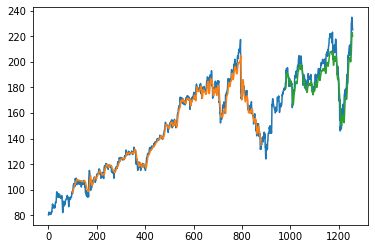

In [94]:
## Plotting
# Shift train predictions for plotting
look_back = 100
trainPredictPlot = np.empty_like(df1) #returns a similar array of same shape and type as the input
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict #ploting train_predict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(df1) #returns a similar array of same shape and type as the input
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back*2) + 1:len(df1) -1, :] = test_predict # ploting test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1)) ## Very important step
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Green color = test data prediction output
# orange color = training data prediction output
# Blue color = the complete dataset

# Predicting for the next 30 days Closing Stock Price

In [95]:
# Number of data points in the test set
len(test_data)

378

Our data covered the Closing stock price upto 29 May 2020. If we predict for 30th May 2020, then we will need the previous 100 days data. So, we will consider the data from 278 days (i.e. 378-100) onwards.

In [96]:
x_input = test_data[278:].reshape(1, -1)
x_input.shape
# we got the required 100 days data now

(1, 100)

In [97]:
# creating a list to store the values of the test_data for the previous 100 days
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [98]:
# demonatrate prediction for next 10 days
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape(1, n_steps, 1)
        
        yhat = model.predict(x_input, verbose=0)
        print("{} day output{}".format(i, yhat))
        
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i += 1
print(lst_output)

[0.85109067]
101
1 day input [0.87265554 0.89257535 0.89102315 0.91592291 0.89749062 0.91100763
 0.91501746 0.91741043 0.9128832  0.9121071  0.90201785 0.89024706
 0.87039193 0.88927694 0.92445997 0.83585565 0.78657354 0.80131936
 0.83779589 0.83960678 0.8443927  0.85396456 0.85868581 0.82072177
 0.84381063 0.85920321 0.86592938 0.88934161 0.8873367  0.86851636
 0.8400595  0.77887725 0.75333075 0.75611176 0.70792912 0.72552063
 0.75119648 0.68296469 0.72092873 0.67830811 0.65192084 0.57696288
 0.63316518 0.5817488  0.47975682 0.5820075  0.42504204 0.44709611
 0.43118613 0.47109042 0.44910102 0.43855905 0.52186004 0.49101022
 0.53712327 0.49476135 0.55400336 0.55950071 0.51293494 0.50381581
 0.47788126 0.55141638 0.57262967 0.60787738 0.61376277 0.61117579
 0.63303583 0.62527487 0.62061829 0.63995602 0.63348855 0.58537059
 0.65961713 0.67804941 0.70999871 0.69337731 0.66369163 0.73664468
 0.80468245 0.78890182 0.80823956 0.81994567 0.82900013 0.84704437
 0.85409391 0.85946191 0.8395421 

###  ploting the output

In [99]:
# ploting the output
day_new = np.arange(1, 101) # taking the 100 data points
day_pred = np.arange(101, 131) # predicting for 30 days

df3 = df1.tolist()
df3.extend(lst_output)

In [100]:
len(df1)

1259

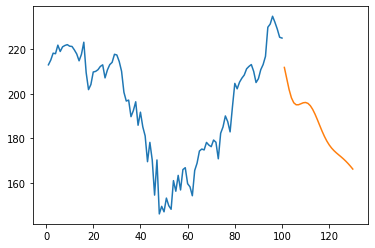

In [101]:
plt.plot(day_new, scaler.inverse_transform(df1[1159: ]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

# the Orange line depicts the Closing Stock Price of FB for the next 30 days.

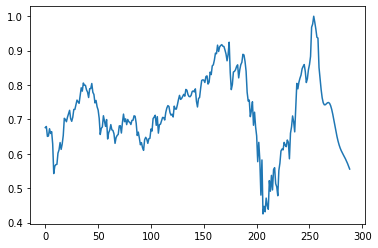

In [102]:
# to see the complete output
plt.plot(df3[1000:]) # we can change the numerical input for customized output

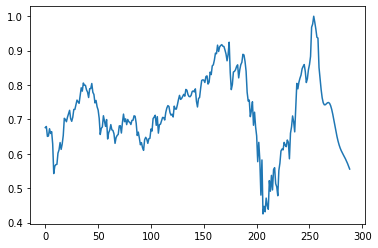

In [103]:
# Or w can combine these two
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])

To improve this model, one can consider different timesteps such as 150 or 175 or one can predict for 100 days except for 30 days